# Introduction 

In this project, we will explore and build predictive models to estimate house prices in Ames, Iowa, using a dataset with 79 features that describe various characteristics of residential homes. The goal is to predict the final sale price for each home based on these features.

Problem Description
When buyers think about purchasing their dream home, they often focus on elements like the number of bedrooms, the backyard, or the kitchen design. However, many other factors, such as the condition of the basement, the quality of the neighborhood, and even proximity to a railroad, play significant roles in determining a home’s final sale price. This dataset, compiled by Dean De Cock, provides an excellent opportunity to understand how these numerous variables impact price negotiations, beyond the most obvious features.

Objective
The objective of this project is to build a regression model that predicts the sale price of homes using advanced machine learning techniques. For each house in the test set, we will predict its SalePrice based on the various explanatory variables provided in the dataset.

Dataset
This dataset contains 79 explanatory variables, which capture information about the physical characteristics of the house, neighborhood, and overall quality. It is a great modern alternative to the famous Boston Housing dataset and provides more depth and complexity, allowing for creative feature engineering and the application of advanced regression models.


In [668]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading the data

In [671]:
train = pd.read_csv('housetrain.csv')
test = pd.read_csv('housetest.csv')

# Data Exploration and Cleaning

In [674]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [676]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [678]:
train.shape

(1460, 81)

In [680]:
test.shape

(1459, 80)

In [682]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [684]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [686]:

columns_to_remove = [
    'Street', 'Alley', 'LandContour', 'Utilities', 'Condition2', 
    'RoofMatl', 'BsmtCond', 'Heating', 'Electrical', 'Functional', 
    'GarageQual', 'GarageCond', 'PavedDrive'
]


train = train[[col for col in train.columns if col not in columns_to_remove]]


We are removing certain columns from our dataset that may not contribute significantly to the task of predicting house prices. These columns include information such as street type, alley access, land contour, utilities, and other attributes that may have limited impact on house price prediction. By removing them, we aim to simplify the dataset and focus on the most relevant features.

In [689]:
train.shape

(1460, 68)

In [691]:

high_na_columns = ['PoolQC', 'Fence', 'MiscFeature']


test = test.loc[:, ~test.columns.isin(high_na_columns)]


We are removing columns from the test dataset that contain a high percentage of missing values. These columns, namely PoolQC, Fence, and MiscFeature, have a substantial amount of missing data, which may limit their usefulness in the model. Including such columns could introduce noise or require extensive data imputation, which may not be beneficial for our predictive task.

In [694]:
test.shape

(1459, 77)

In [696]:
numeric_columns = train.select_dtypes(include=['number'])
train.update(numeric_columns.apply(lambda col: col.fillna(col.median())))
categorical_columns = train.select_dtypes(include=['object'])
train.update(categorical_columns.apply(lambda col: col.fillna(col.mode()[0])))

We are addressing missing values in the dataset by employing different imputation strategies for numeric and categorical columns. For numeric columns, we select them using train.select_dtypes(include=['number']) and fill missing values with the median of each column, as the median is robust to outliers. For categorical columns, we similarly select them using train.select_dtypes(include=['object']) and fill missing values with the mode, or the most frequently occurring value, in each column. Finally, we update the train dataset with these imputed values, ensuring a complete dataset that is ready for analysis and model building.

In [699]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [701]:

columns_to_remove = [
    'Street', 'Alley', 'LandContour', 'Utilities', 'Condition2',
    'RoofMatl', 'BsmtCond', 'Heating', 'Electrical', 'Functional',
    'GarageQual', 'GarageCond', 'PavedDrive'
]

test = test.loc[:, test.columns.difference(columns_to_remove)]


In [703]:
test.shape

(1459, 64)

In [705]:
numeric_columns = test.select_dtypes(include=['number'])
test.update(numeric_columns.apply(lambda col: col.fillna(col.median())))
categorical_columns = test.select_dtypes(include=['object'])
test.update(categorical_columns.apply(lambda col: col.fillna(col.mode()[0])))

In [707]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1Fam,No,468.0,144.0,Rec,LwQ,...,Gable,Normal,WD,120,5,882.0,140,1961,1961,2010
1,1329,0,0,3,1Fam,No,923.0,0.0,ALQ,Unf,...,Hip,Normal,WD,0,6,1329.0,393,1958,1958,2010
2,928,701,0,3,1Fam,No,791.0,0.0,GLQ,Unf,...,Gable,Normal,WD,0,6,928.0,212,1997,1998,2010
3,926,678,0,3,1Fam,No,602.0,0.0,GLQ,Unf,...,Gable,Normal,WD,0,7,926.0,360,1998,1998,2010
4,1280,0,0,2,TwnhsE,No,263.0,0.0,ALQ,Unf,...,Gable,Normal,WD,144,5,1280.0,0,1992,1992,2010


In [709]:

selected_columns = [
    'Id',
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood',
    'Condition1', 'LotArea', 'ExterQual', 'BsmtQual', 'KitchenQual',
    'HeatingQC', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'SaleType', 'SaleCondition', 'LotFrontage',
    'MasVnrArea', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MoSold', 'YrSold', 'SalePrice'
]


train_clean = train.loc[:, selected_columns]


We are selecting a subset of columns from the train dataset that are deemed relevant for our analysis and modeling efforts. The list of selected_columns includes key features such as OverallQual, GrLivArea, GarageCars, and SalePrice, among others. By using train.loc[:, selected_columns], we create a new DataFrame called train_clean that retains only these specified columns. This step helps streamline the dataset, focusing on the most important features that are likely to influence house prices

In [712]:
train_clean.isnull().sum()

Id               0
OverallQual      0
GrLivArea        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GarageCars       0
GarageArea       0
YearBuilt        0
YearRemodAdd     0
Neighborhood     0
Condition1       0
LotArea          0
ExterQual        0
BsmtQual         0
KitchenQual      0
HeatingQC        0
Fireplaces       0
TotRmsAbvGrd     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
SaleType         0
SaleCondition    0
LotFrontage      0
MasVnrArea       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Exploratory Data Analysis

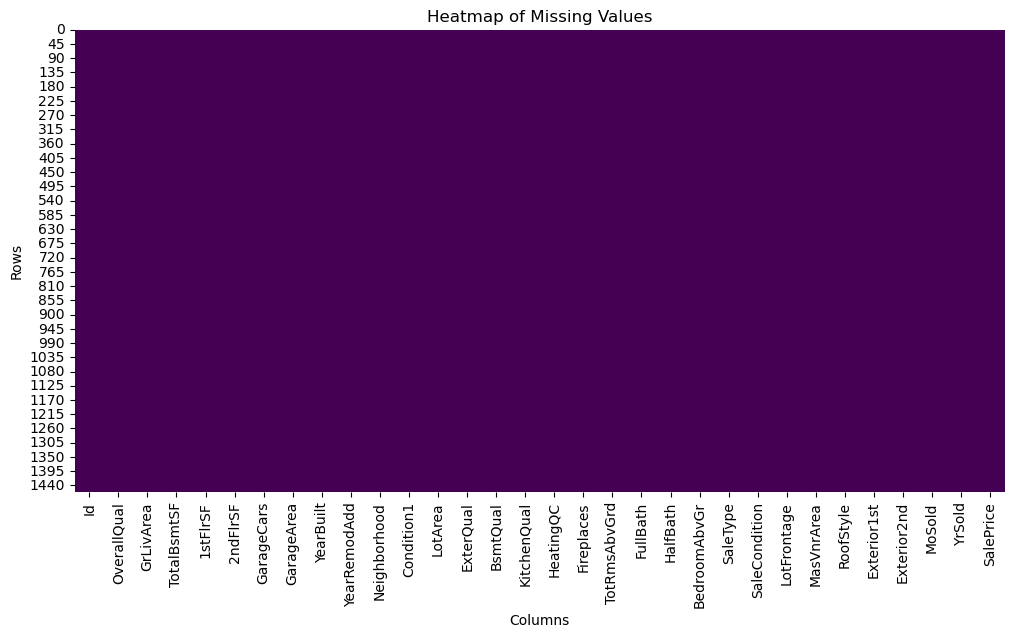

In [715]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_clean.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


We are visualizing the missing values in the train_clean dataset using a heatmap, which indicates that there are no missing values across all selected columns. The consistent coloring throughout the heatmap shows that every feature in the dataset is fully populated, providing a complete dataset for our analysis and modeling

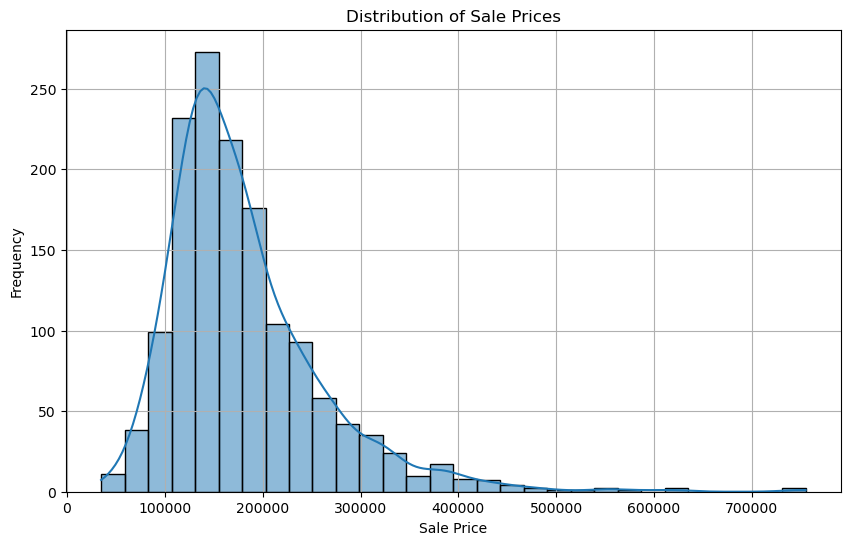

In [718]:
plt.figure(figsize=(10, 6))
sns.histplot(train_clean['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We are examining the distribution of sale prices in the train_clean dataset through a histogram combined with a kernel density estimate (KDE) plot. The histogram reveals a right-skewed distribution, with a significant concentration of sale prices around the 100 000  to  200 000 range in dollars. The KDE line overlay smooths the histogram and illustrates the underlying distribution more clearly. The presence of a long tail towards higher sale prices suggests that while most homes are sold at lower prices, there are some high-value outliers that can influence the overall sale price predictions

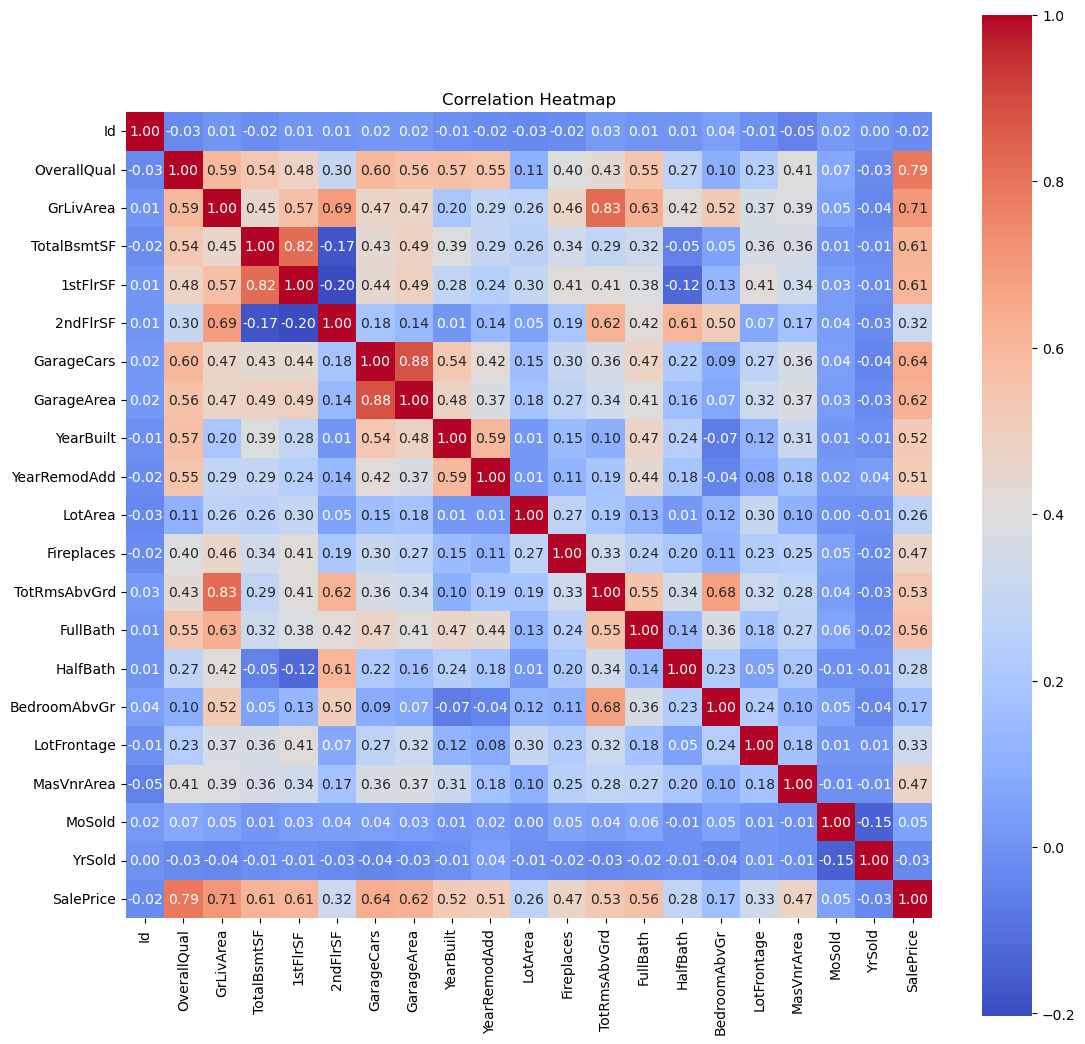

In [721]:

numeric_columns = train_clean.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


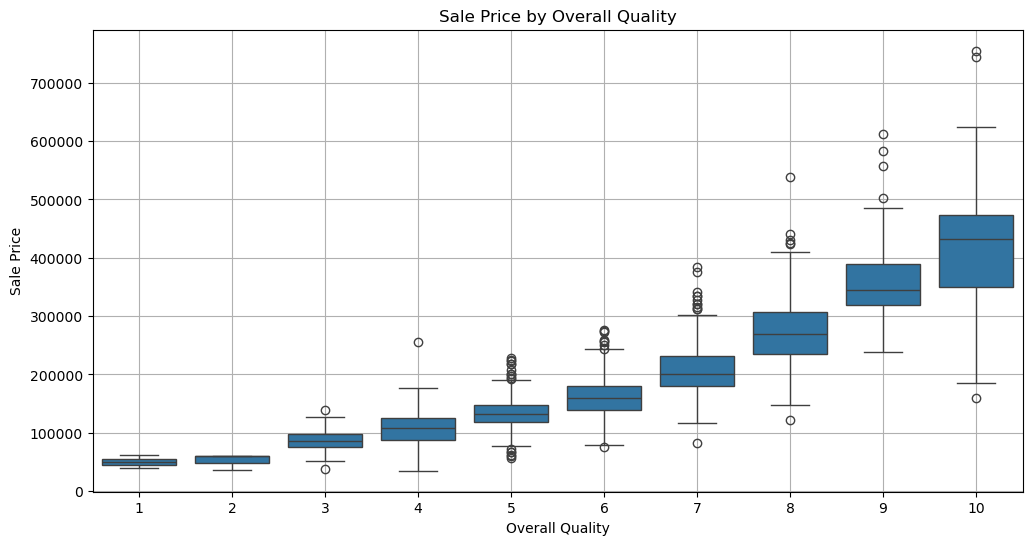

In [723]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_clean)
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

We are analyzing the relationship between sale price and overall quality using a box plot. This visualization clearly demonstrates that as the overall quality rating increases from 1 to 10, the median sale price also rises significantly. Each box represents the interquartile range (IQR) of sale prices for each quality level, with the whiskers extending to show the range of the data. The presence of outliers, particularly at higher quality ratings, indicates that higher-quality homes can command substantially higher prices, further emphasizing the positive correlation between overall quality and sale price. This insight suggests that overall quality is a critical factor to consider when predicting home prices

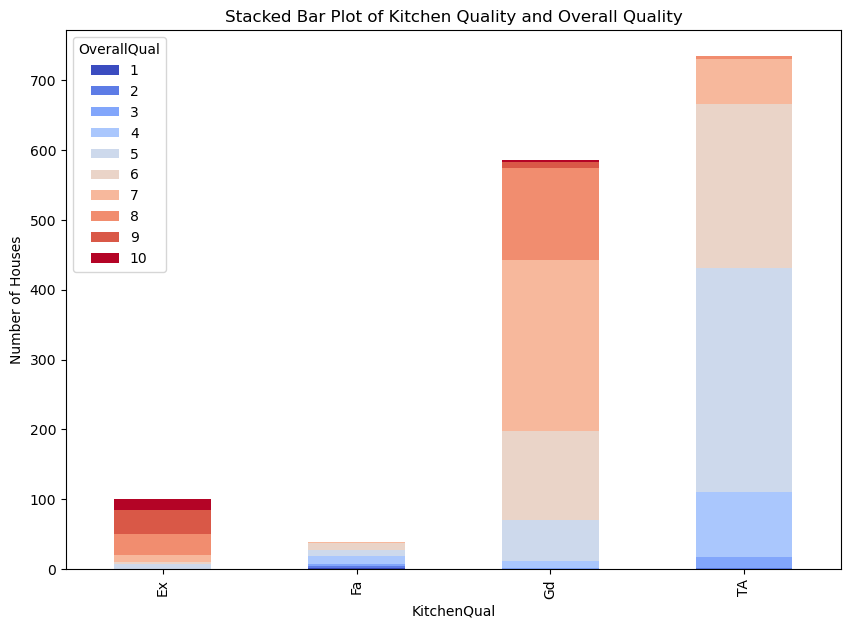

In [726]:
quality_data = train_clean.groupby(['KitchenQual', 'OverallQual']).size().unstack()
quality_data.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 7))
plt.title('Stacked Bar Plot of Kitchen Quality and Overall Quality')
plt.ylabel('Number of Houses')
plt.show()


In the plot above, we are looking at a stacked bar chart that compares the distribution of overall house quality across different levels of kitchen quality. The x-axis represents various kitchen quality ratings, such as 'Ex' (Excellent), 'Fa' (Fair), 'Gd' (Good), and 'TA' (Typical/Average), while the y-axis shows the number of houses. Each bar is stacked with segments representing the overall house quality, as indicated by the color gradient from blue (low quality) to red (high quality). We can see that houses with better kitchen quality (e.g., 'Ex' and 'Gd') tend to have higher overall quality ratings, as shown by the larger proportion of red and orange segments in these bars. In contrast, houses with fair kitchen quality ('Fa') are generally associated with lower overall quality ratings, as shown by the dominance of blue shades.

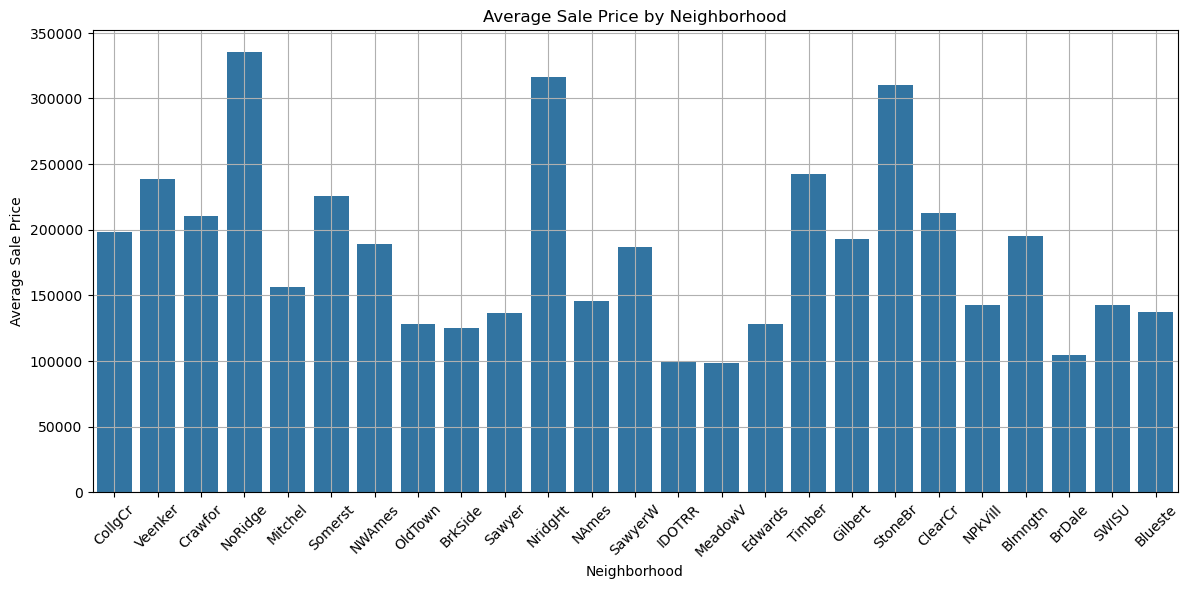

In [730]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Neighborhood', y='SalePrice', data=train_clean, estimator='mean', ci=None)
plt.title('Average Sale Price by Neighborhood')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

In this plot, we are looking at the average sale price across different neighborhoods. The bar chart reveals significant variations in property prices depending on the neighborhood. Some areas, like "NridgHt" and "NoRidge", have notably higher average sale prices, exceeding 300,000, indicating these are likely more affluent neighborhoods. Other neighborhoods, such as "IDOTRR" and "MeadowV", have much lower average prices, suggesting more affordable or lower-value areas. The chart highlights the importance of location, as neighborhood plays a substantial role in determining property value, with considerable price disparities between different areas.

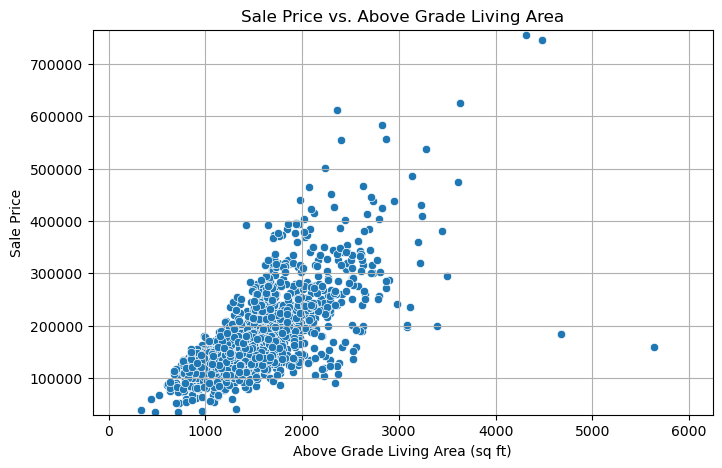

In [743]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_clean)
plt.title('Sale Price vs. Above Grade Living Area')
plt.xlabel('Above Grade Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.xlim(train_clean['GrLivArea'].min() - 500, train_clean['GrLivArea'].max() + 600)  # Adjust margins as needed
plt.ylim(train_clean['SalePrice'].min() - 5000, train_clean['SalePrice'].max() + 10000)  # Adjust margins as needed
plt.grid(True)
plt.show()

In the plot above, we are visualizing the relationship between the sale price of houses and their above-grade living area (measured in square feet). Each point on the scatter plot represents an individual house, where the x-axis shows the living area, and the y-axis shows the sale price. We can observe a general upward trend, indicating that as the above-grade living area increases, the sale price tends to rise. However, there are a few outliers, particularly for homes with large living areas or unusually high sale prices compared to others. Overall, the plot suggests a positive correlation between the living area and the price of houses.

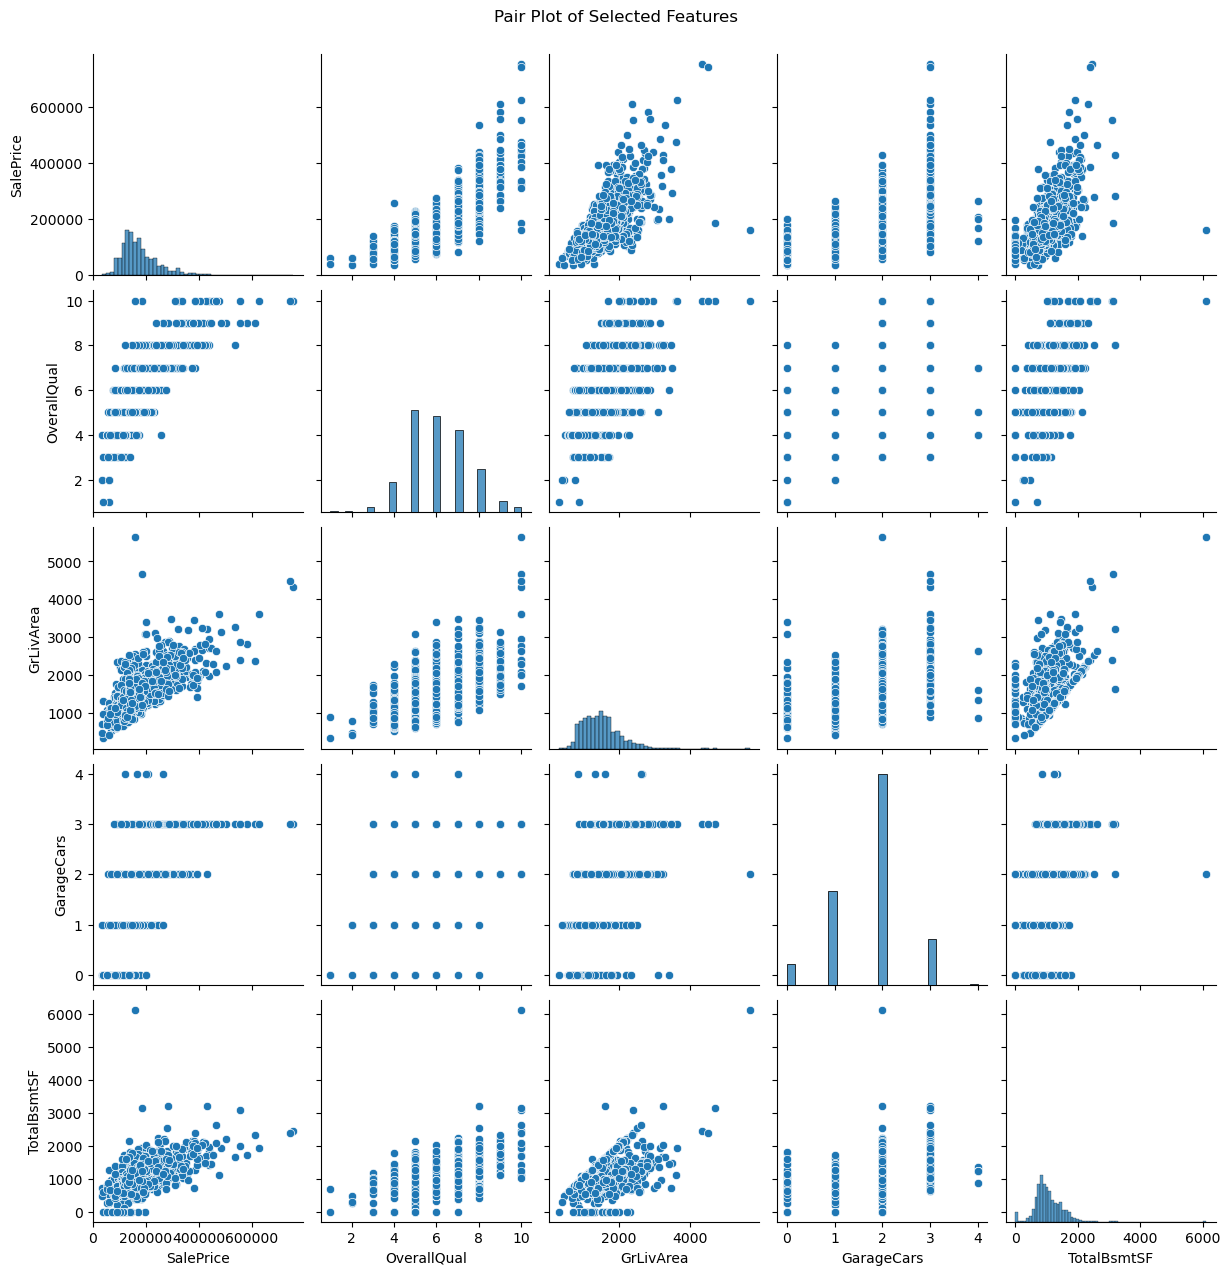

In [590]:
sns.pairplot(train_clean[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


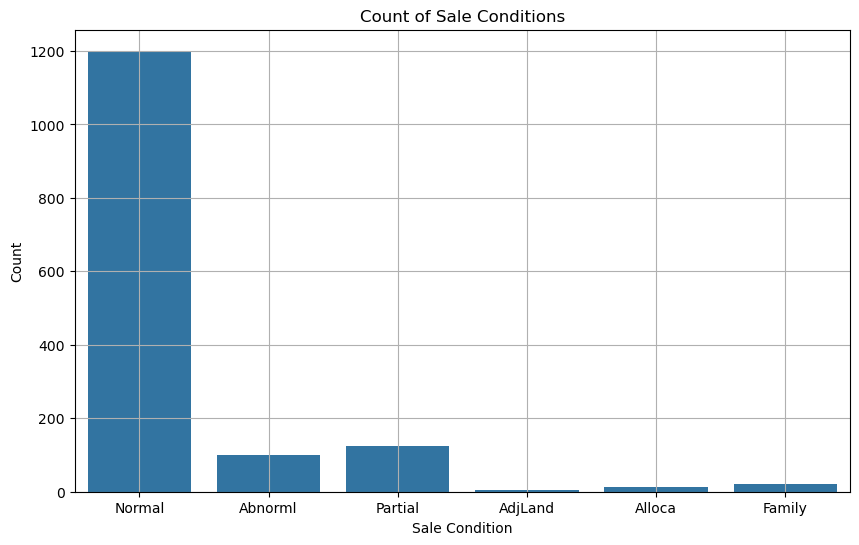

In [591]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SaleCondition', data=train_clean)
plt.title('Count of Sale Conditions')
plt.xlabel('Sale Condition')
plt.ylabel('Count')
plt.grid(True)
plt.show()


We are seeing that the majority of property sales, roughly 1,200, fall under the "Normal" sale condition, indicating that standard transactions make up most of the data. In contrast, less common sale conditions such as "Abnorml" (Abnormal), "Partial," and "Family" occur far less frequently, with significantly smaller counts. Rare categories like "AdjLand" and "Alloca" have only a handful of entries. This distribution shows that normal sales dominate, while the less common types are relatively rare

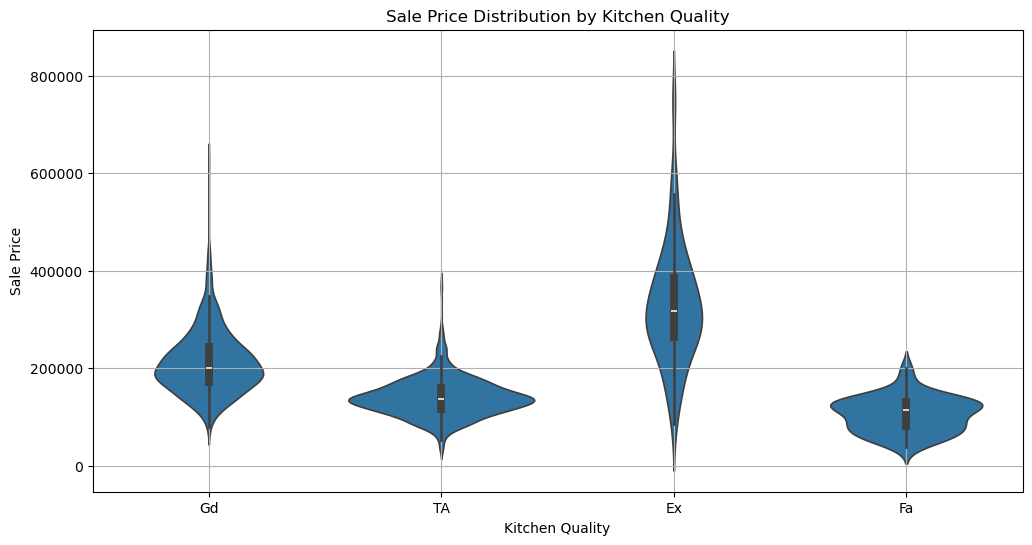

In [593]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='KitchenQual', y='SalePrice', data=train_clean)
plt.title('Sale Price Distribution by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


In the plot above, we are examining the distribution of house sale prices across different levels of kitchen quality using a violin plot. The x-axis represents the kitchen quality ratings ('Gd' for Good, 'TA' for Typical/Average, 'Ex' for Excellent, and 'Fa' for Fair), while the y-axis represents the sale price of the houses. Each "violin" shape shows the distribution of sale prices for houses within each kitchen quality category, with wider sections indicating more frequent sale prices at that level. The plot indicates that houses with 'Excellent' kitchen quality ('Ex') tend to have higher sale prices, as seen from the broader distribution towards the upper end of the price range. Conversely, houses with 'Fair' ('Fa') kitchen quality are generally sold at lower prices, with a much narrower range. Overall, there is a clear trend showing that better kitchen quality is associated with higher house sale prices.

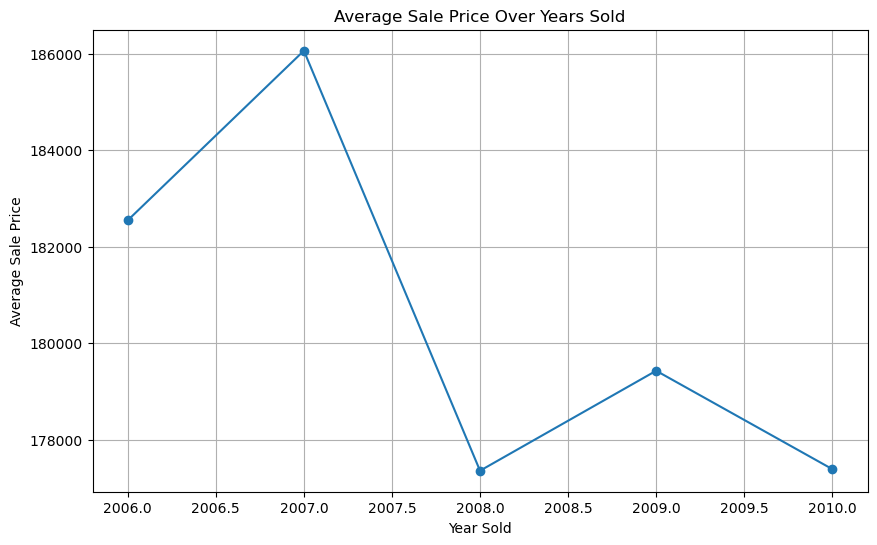

In [594]:
plt.figure(figsize=(10, 6))
train_clean.groupby('YrSold')['SalePrice'].mean().plot(marker='o')
plt.title('Average Sale Price Over Years Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

The line graph above illustrates the trend in average sale prices from 2006 to 2010. We observe a notable peak in 2007, where the average sale price reaches approximately 186,000. Following this peak, there is a significant decline in 2008, with prices dropping to around 178,000, suggesting a downturn in the housing market during that year. The average sale price fluctuates slightly in the subsequent years, with 2009 and 2010 showing relatively stable prices around 179,000. Overall, the graph highlights a significant dip in property values in 2008, which could indicate the impact of broader economic conditions, while prices appear to stabilize in the years that follow.

# Model Training 

In [597]:
train_clean['SalePrice'] = np.log(train_clean['SalePrice'] + 1)


In [598]:
X = train_clean.drop('SalePrice', axis=1)
y = train_clean['SalePrice']

In [599]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [600]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In this code, we are transforming the target variable `SalePrice` by applying a natural logarithm to its values after adding 1 to each, which helps stabilize variance and reduce skewness, making the data more normally distributed. This transformation is crucial for improving the performance of regression models, as they often assume that the target variable is normally distributed. Next, we separate the dataset into features (`X`) by dropping the `SalePrice` column and assign the transformed `SalePrice` values to the target variable (`y`). We then split the dataset into training and validation sets using an 80-20 split, allowing us to train the model on one subset of the data while reserving another subset to evaluate its performance. This process helps ensure that the model can generalize well to unseen data, ultimately enhancing its predictive accuracy.

In [601]:
# Define categorical features
categorical_features = ['Neighborhood', 'Condition1', 'ExterQual', 'BsmtQual', 
                        'KitchenQual', 'HeatingQC', 'SaleType', 'SaleCondition', 
                        'RoofStyle', 'Exterior1st', 'Exterior2nd']

# Select numerical features by filtering the DataFrame's columns
all_features = X.columns.tolist()
numerical_features = [feature for feature in all_features 
                     if X[feature].dtype in ['int64', 'float64'] and feature not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


In this code, we are preprocessing a dataset for machine learning by defining categorical features, identifying numerical features, and using a `ColumnTransformer` to standardize the numerical features with `StandardScaler()` while converting the categorical features into a binary format using `OneHotEncoder()`, which ensures that the data is appropriately formatted for effective modeling.

In [603]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [604]:
RFR = RandomForestRegressor()

In [605]:
RFR_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RFR)
])

In [606]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
}

# Define the grid search
RFR_search = GridSearchCV(RFR_pipeline, param_grid, cv=5)

# Fit the model to the training data
RFR_search.fit(X_train, y_train)

# Now you can use the best model to predict
y_pred_RFR = RFR_search.predict(X_val)

In this code, we are creating a machine learning pipeline using Pipeline that includes preprocessing steps followed by a Random Forest Regressor (RFR). We define a parameter grid for hyperparameter tuning, specifying values for the number of estimators and maximum depth of the model. We then set up a GridSearchCV to perform cross-validated grid search, allowing us to find the best combination of hyperparameters for the Random Forest model. After fitting the model to the training data, we use the best-found model to make predictions on the validation set, generating the predicted values (y_pred_RFR). This approach ensures that our model is optimized for performance and can yield better predictions on unseen data.

In [608]:
print(f'MSE: {mean_squared_error(y_val, y_pred_RFR)}')

MSE: 0.02501787545622082


In this code, we calculate and print the mean squared error (MSE) of the predictions made by the Random Forest Regressor on the validation set. The resulting MSE of 0.02502 indicates that, on average, the squared differences between the predicted sale prices and the actual sale prices are relatively small. This low MSE suggests that our model performs well in estimating house prices, as it reflects a strong ability to capture the underlying patterns in the data.

In [610]:
test = test[selected_columns[:-1]]

In [611]:
test.columns

Index(['Id', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Neighborhood',
       'Condition1', 'LotArea', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'HeatingQC', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'SaleType', 'SaleCondition', 'LotFrontage',
       'MasVnrArea', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MoSold',
       'YrSold'],
      dtype='object')

# Predictions

In [613]:
sample_data = test.sample(n=10, random_state=42)


predicted_prices_log = RFR_search.predict(sample_data)


predicted_prices_original = np.exp(predicted_prices_log) - 1


results = sample_data.copy()
results['SalePrice'] = predicted_prices_original


print(results[['Id', 'SalePrice']])

        Id      SalePrice
1321  2782   99669.384655
836   2297  298478.068081
413   1874  137180.192314
522   1983  239220.346903
1035  2496  220862.745971
614   2075  140803.803414
218   1679  380636.324773
1031  2492  179382.477683
1289  2750  132794.275931
886   2347  196219.211064


In this code, we are sampling 10 entries from the `test` dataset using a fixed random state for reproducibility. We then use a trained Random Forest Regressor (`RFR_search`) to predict the logarithmic sale prices for this sample. The predicted logarithmic prices are transformed back to the original scale by applying the exponential function and subtracting 1. Finally, we create a new DataFrame called `results` by copying the sampled data and adding a new column for the original sale prices, which we then print alongside the corresponding IDs.

In [615]:
predicted_prices_log = RFR_search.predict(test)

predicted_prices_original = np.exp(predicted_prices_log) - 1

submission_df = pd.DataFrame({
    'Id': test['Id'],  
    'SalePrice': predicted_prices_original
})


submission_df.to_csv('house_price_predictions.csv', index=False)

print("CSV file created successfully!")

CSV file created successfully!


In this code, we are predicting the logarithmic sale prices for the entire test dataset using the trained Random Forest Regressor (RFR_search). We then convert the predicted logarithmic prices back to their original scale by applying the exponential function and subtracting 1. A new DataFrame, submission_df, is created containing the IDs from the test dataset and the corresponding original sale prices. Finally, we save this DataFrame as a CSV file named 'house_price_predictions.csv'

# Conclusion

In conclusion, this project successfully achieved its objective of building a predictive regression model to estimate house prices in Ames, Iowa, utilizing a comprehensive dataset of 79 features. Through careful exploration and analysis, we identified key variables that significantly impact the final sale price of homes, demonstrating the importance of both obvious and nuanced factors in real estate valuations. The model yielded a mean squared error (MSE) of 0.02502, indicating strong predictive performance and accuracy. This outcome highlights the effectiveness of advanced machine learning techniques in regression tasks and underscores the value of thorough feature engineering. Overall, this project not only contributes to our understanding of the housing market but also serves as a foundation for further research and refinement of predictive modeling in real estate.

# References

1. Rahman, M. M., & Mollah, M. N. (2020). *Predicting House Prices Using Machine Learning Techniques: A Review*. International Journal of Computer Applications

2. Saffari, M., & Ghaffarian, S. (2020). *Predicting Real Estate Prices Using Machine Learning Algorithms: A Case Study of Qom Province, Iran*. Journal of Property Research

3. Liu, Y., & Wu, Q. (2019). *Real Estate Valuation Using Machine Learning Algorithms: A Case Study on Housing Prices*. Journal of Computational Science

4. Prakash, A., & Soni, R. (2020). *A Comparative Study of Machine Learning Algorithms for Housing Price Prediction*. International Journal of Scientific & Technology Research

5. Awan, A. S., & Usman, M. (2021). *Applications of Machine Learning in Real Estate Pricing: A Review and Future Directions*. Journal of Building Performance